In [64]:
import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV


Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


# Train the Classifiers

## Import data, setup models

In [49]:
from sklearn.neighbors import KNeighborsClassifier
import os
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = ('ignore::UserWarning,ignore::ConvergenceWarning,ignore::RuntimeWarning')
train_set = pd.read_csv("./spam_train.csv")
test_set = pd.read_csv("./spam_test.csv")

X_train = np.array(train_set[list(train_set.columns[1:-1])])
y_train = np.array(train_set["class"])
X_test = np.array(test_set[list(test_set.columns[1:-1])])
y_test = np.array(test_set["class"])

np.random.seed(2)

knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print("KNN Training score: {:.8f}".format(knn.score(X_train, y_train)))
print(
    "KNN Testing score: {:.8f}".format(knn.score(X_test, y_test))
)

logreg = LogisticRegression().fit(X_train, y_train)
print("Logistic Regression Training score: {:.8f}".format(logreg.score(X_train, y_train)))
print(
    "Logistic Regression Testing score: {:.8f}".format(logreg.score(X_test, y_test))
)

lsvc = LinearSVC().fit(X_train, y_train)
print("LinearSVC Training score: {:.8f}".format(lsvc.score(X_train, y_train)))
print("LinearSVC Testing score: {:.8f}".format(lsvc.score(X_test, y_test)))

KNN Training score: 0.99971014
KNN Testing score: 0.80278019
Logistic Regression Training score: 0.92869565
Logistic Regression Testing score: 0.91225022
LinearSVC Training score: 0.86550725
LinearSVC Testing score: 0.86099044


## KNN Train

In [51]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print("KNN Training score: {:.8f}".format(knn.score(X_train, y_train)))
print("KNN Testing score: {:.8f}".format(knn.score(X_test, y_test)))


def knn_and_graph(neighbor_max):
    plt.style.use('_mpl-gallery')
    x = np.linspace(1, neighbor_max, neighbor_max)
    results = []
    for neighbor_count in x:
        clf = KNeighborsClassifier(n_neighbors=int(neighbor_count))
        clf.fit(X_train, y_train)
        results.append(
            [
                neighbor_count,
                clf.score(X_train, y_train),
                clf.score(X_test, y_test)
            ]
        )

    x = [neighbors[0] for neighbors in results]
    plt.title("KNN")
    plt.xlabel("Neighbors")
    plt.ylabel("Accuracy (0 - 1)")
    plt.plot(x, [train[1] for train in results], label='Training Score')
    plt.plot(x, [test[2] for test in results], label='Testing Score')
    plt.legend()
    # fig = plt.figure()
    plt.show()
    #

    print("Test set predictions: {}".format(clf.predict(X_test)))
    print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
    clf = KNeighborsClassifier(n_neighbors=int(5))
    clf.fit(X_train, y_train)

    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))

KNN Training score: 0.99971014
KNN Testing score: 0.80278019


### KNN Train first view

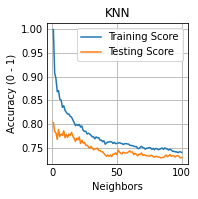

Test set predictions: [0 0 0 ... 0 1 1]
Test set accuracy: 0.73
0.8704347826086957
0.788010425716768


In [52]:
knn_and_graph(100)

### KNN Train second view

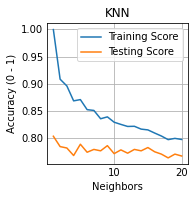

Test set predictions: [1 0 0 ... 1 0 1]
Test set accuracy: 0.77
0.8704347826086957
0.788010425716768


In [53]:
knn_and_graph(20)

## KNN Validation

KNN
Best K:  1
Train score:  0.9997101449275362
[0.02949694 0.01784434 0.02284896 0.00842078 0.01084538 0.01032958
 0.01268758 0.0141881  0.01586543 0.01245365 0.01546316 0.01895395
 0.01417033 0.01461973 0.01233162 0.01468281 0.0139733  0.01623188
 0.01777358]


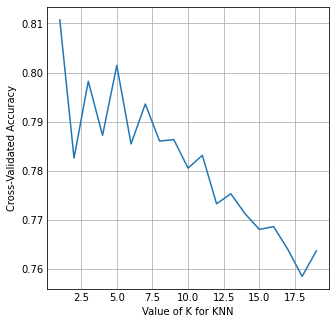

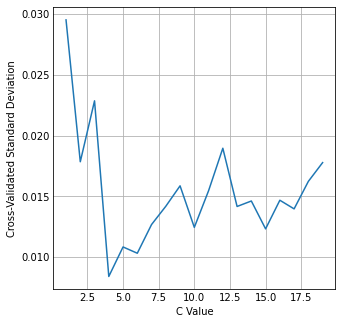

In [126]:
print("KNN")
k_range = range(1, 20)
k_scores = []
knn = KNeighborsClassifier().fit(X_train, y_train)
hyperparameters = dict(n_neighbors=k_range)
clf = GridSearchCV(knn, hyperparameters, cv=5)
clf.fit(X_train, y_train)
scores_knn = clf.cv_results_['mean_test_score']
std_scores = clf.cv_results_['std_test_score']
optimal_k_val = clf.best_params_['n_neighbors']
print("Best K: ", optimal_k_val)
print("Train score: ", KNeighborsClassifier(n_neighbors=optimal_k_val).fit(X_train, y_train).score(X_train, y_train))
print(std_scores)
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
#     k_scores.append(scores.mean())
# plot to see clearly
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
plt.plot(k_range, scores_knn)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
plt.plot(k_range, std_scores)
plt.xlabel('C Value')
plt.ylabel('Cross-Validated Standard Deviation')
plt.show()

# Logistic Regression

## Logreg Train

In [107]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Logistic Regression Training score: {:.8f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression Testing score: {:.8f}".format(logreg.score(X_test, y_test)))


def logreg_explore_and_graph(c_vals):
    hyperparameters = dict(C=c_vals)
    clf = GridSearchCV(logreg, hyperparameters, cv=5)
    clf.fit(X_train, y_train)
    scores_logreg = clf.cv_results_['mean_test_score']
    std_scores = clf.cv_results_['std_test_score']
    optimal_c_val = clf.best_params_['C']
    print("Best C: ", optimal_c_val)
    print("Train score: ", LogisticRegression(C=optimal_c_val).fit(X_train, y_train).score(X_train, y_train))
    print(std_scores)
    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(4)
    plt.plot(c_vals, scores_logreg)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(4)
    plt.plot(c_vals, std_scores)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Standard Deviation')
    plt.show()

Logistic Regression Training score: 0.92869565
Logistic Regression Testing score: 0.91225022


## Logreg Validate first view

Best C:  21.544346900318832
Train score:  0.9298550724637681
[0.0072753  0.01406917 0.01366936 0.01168084 0.01291726 0.01147035
 0.01329547 0.01265442 0.01066572 0.01284552]


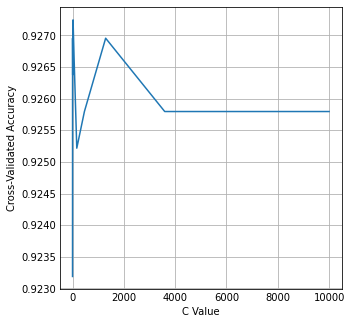

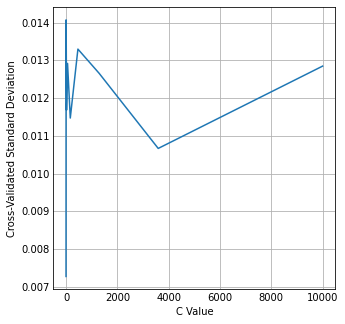

In [108]:
logreg_explore_and_graph(np.logspace(0, 4, 10))

## Logreg Validate second view

Best C:  23.075859961954897
Train score:  0.9307246376811594
[0.01170239 0.01352105 0.01214628 0.01241988 0.01135255 0.01212551
 0.00950795 0.01235204 0.00847052 0.01321943 0.00984654 0.0133962
 0.01394923 0.01537599 0.01400933 0.01570576 0.00900885 0.01111321
 0.01175969 0.01298214]


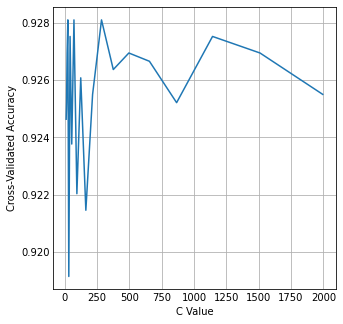

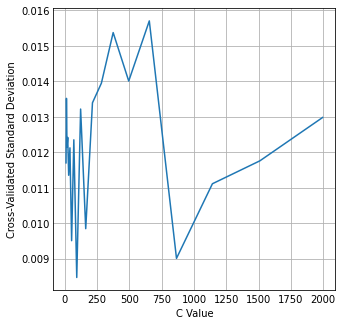

In [109]:
logreg_explore_and_graph(np.logspace(1, 3.3, 20))

## Logreg Validate first linspace view

Best C:  26.153846153846153
Train score:  0.928695652173913
[0.01170239 0.01553904 0.01268758 0.01191583 0.01192992 0.01155791
 0.01320671 0.01402132 0.01258786 0.00718233 0.01205602 0.01287818
 0.00891511 0.01211164 0.01182381 0.0119721  0.00998213 0.01287818
 0.00980379 0.01109808 0.01147035 0.01220837 0.01055486 0.01348994
 0.01075202 0.00885838 0.01150692 0.00879174 0.01370006 0.0121047
 0.0115942  0.01161592 0.01345252 0.01032958 0.01278652 0.00807443
 0.00950795 0.00848043 0.01231117 0.0140632 ]


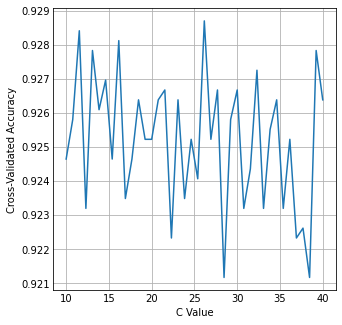

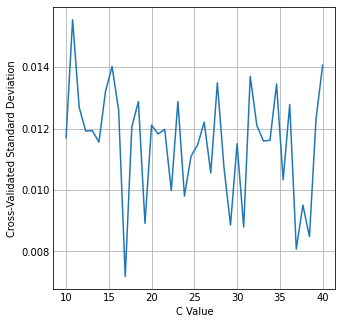

In [110]:
logreg_explore_and_graph(np.linspace(10, 40, 40))

### Logreg final linspace

Best C:  26.224489795918366
Train score:  0.9289855072463769
[0.01272064 0.00913848 0.01450434 0.01382217 0.01271404 0.01366936
 0.01415253 0.00827992 0.01264778 0.01109808 0.0121601  0.01258118
 0.01526631 0.01304026 0.01358304 0.00804315 0.01066572 0.011241
 0.00912008 0.00981235 0.01183092 0.01239957 0.011241   0.01258786
 0.01255444 0.01154337 0.01415846 0.01365707 0.01321943 0.00729836
 0.009437   0.00826976 0.01294974 0.01268095 0.01196508 0.01370619
 0.01400933 0.01330179 0.01291726 0.01261452 0.00963087 0.00932054
 0.01113587 0.01399133 0.01245365 0.01206995 0.01326384 0.00882036
 0.00982946 0.00972635]


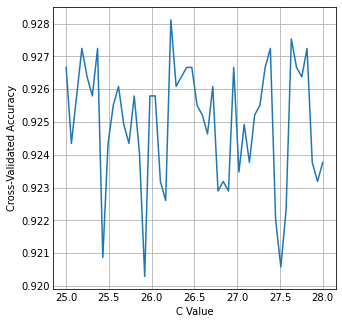

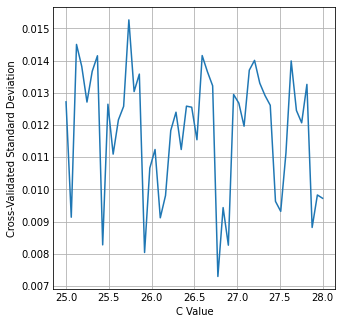

In [111]:
logreg_explore_and_graph(np.linspace(25, 28, 50))

### Logreg Test

Logreg best train score:  0.9289855072463769
Logreg best test score:  0.9200695047784535
57
ingored:  0


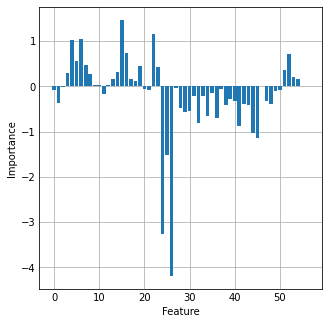

In [146]:
print(
    "Logreg best train score: ",
    LogisticRegression(C=26.224489795918366)
        .fit(X_train, y_train)
        .score(X_train, y_train)
)
logreg = LogisticRegression(C=26.224489795918366).fit(X_test, y_test)
print(
    "Logreg best test score: ",
    logreg.score(X_test, y_test)
)
importance = logreg.coef_[0]
print(len(importance))
print("ingored: ", (importance == 0).sum())


fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

## 5-fold cv for linearSVC

In [114]:
np.random.seed(42)

lsvc = LinearSVC().fit(X_train, y_train)
print("Linear SVC Training score: {:.8f}".format(lsvc.score(X_train, y_train)))
print("Linear SVC Testing score: {:.8f}".format(lsvc.score(X_test, y_test)))


def lsvc_explore_and_graph(c_vals):
    hyperparameters = dict(C=c_vals)
    clf = GridSearchCV(lsvc, hyperparameters, cv=5)
    clf.fit(X_train, y_train)
    cv_scores = clf.cv_results_['mean_test_score']
    cv_standard_deviations = clf.cv_results_['std_test_score']
    optimal_c_val = clf.best_params_['C']

    print("Best C: ", optimal_c_val)
    print("Train score: ", LinearSVC(C=optimal_c_val).fit(X_train, y_train).score(X_train, y_train))

    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(4)
    plt.plot(c_vals, cv_scores)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(4)
    plt.plot(c_vals, cv_standard_deviations)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Standard Deviation')
    plt.show()

Linear SVC Training score: 0.89768116
Linear SVC Testing score: 0.89400521


Best C:  11.28837891684689
Train score:  0.8747826086956522


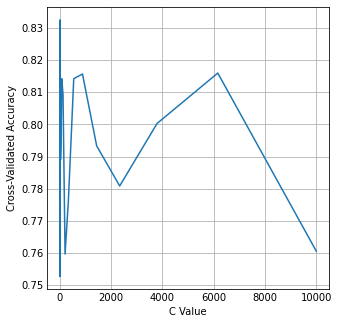

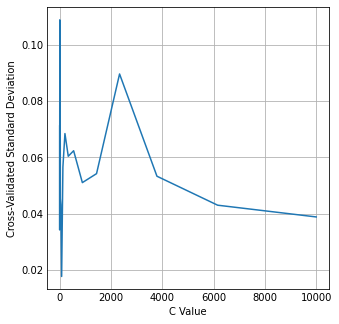

In [115]:
lsvc_explore_and_graph(np.logspace(0, 4, 20))

### LSVC Validate logspace 2

Best C:  0.00379269019073225
Train score:  0.9020289855072464


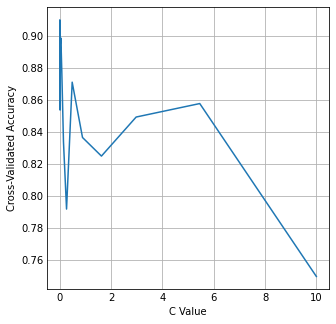

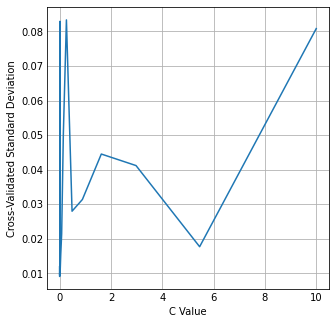

In [116]:
lsvc_explore_and_graph(np.logspace(-4, 1, 20))

### LSVC Validate linspace 1

Best C:  0.020202020202020204
Train score:  0.9043478260869565


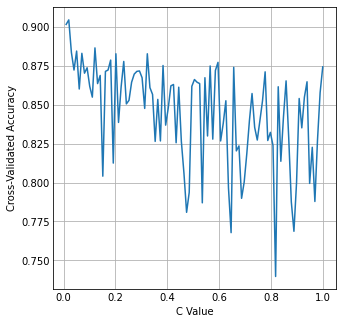

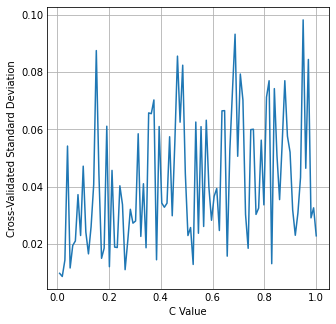

Best C:  0.02040816326530612
Train score:  0.8956521739130435


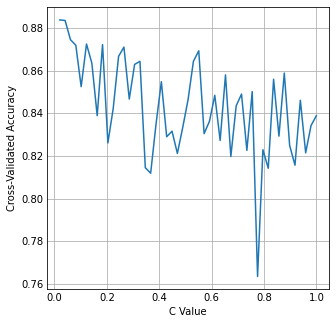

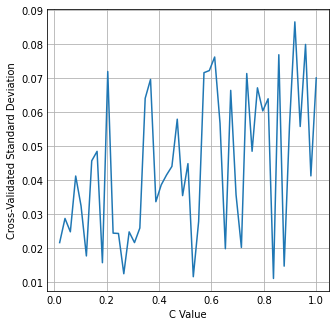

In [118]:
lsvc_explore_and_graph(np.linspace(0, 1, 50))

### LSVC Validate linspace 2

Best C:  0.010816326530612244
Train score:  0.9104347826086957


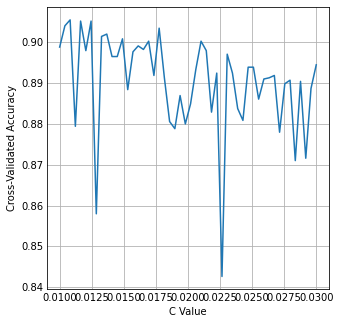

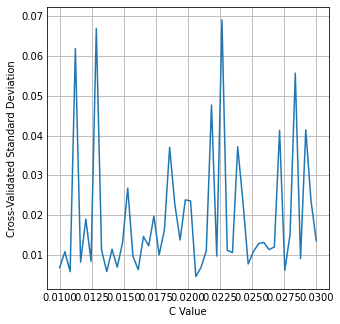

In [119]:
lsvc_explore_and_graph(np.linspace(0.01, 0.03, 50))

### LSVC Test

In [145]:
np.random.seed(42)

print(
    "LSVC best training score: ",
    LinearSVC(C=0.010816326530612244)
        .fit(X_train, y_train)
        .score(X_train, y_train)
)
lsvc = LinearSVC(C=0.010816326530612244).fit(X_test, y_test)
print(
    "LSVC best test score: ",
    lsvc.score(X_test, y_test)
)
features = lsvc.coef_[0]
print((features == 0).sum())
print(features)

LSVC best training score:  0.912463768115942
LSVC best test score:  0.8827106863596872
0
[-0.07134735 -0.03765095 -0.03918451  0.05420401  0.18193186  0.18378011
  0.33484253  0.0944076   0.05852568 -0.01334169 -0.03660341 -0.09299516
 -0.04114266  0.09974632  0.10178794  0.31428507  0.19822377  0.00570389
  0.03320356  0.11018797  0.05210696 -0.0149356   0.29527152  0.0647797
 -0.35239876 -0.14298115 -0.33116341  0.06981038 -0.09104025 -0.07162807
 -0.04609997 -0.01248389 -0.14867511 -0.01248389 -0.0689208   0.0679646
 -0.07094679 -0.03377426 -0.08932462 -0.00268791 -0.09938229 -0.18375055
 -0.12227956 -0.12402463 -0.18881609 -0.24917415  0.00510719 -0.09890563
 -0.08428238 -0.0319351  -0.02819683  0.05400621  0.25705058  0.03639796
  0.02297093  0.00503947  0.00134909]
